# Principal Components Analysis

<img src="./sharif.png" alt="SUT logo" width=300 height=300 align=left class="saturate">

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2024<br>
<font color=3C99D size=5>
    Practical Assignment 5<br>
<font color=696880 size=4>
    Amirhossein Alamdar

____

In [67]:
student_number = 0000
full_name = "Ali Rahimi"
assert student_number and full_name is not None, 'pls input your information'

# Introduction

In this assignment, you will implement PCA and try to interpret it.

In [68]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset Preparation (30)

Read the nutrition CSV file and display a few samples.

In [69]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
%cp /content/gdrive/MyDrive/ML/HW5/Practical/nutrition.csv /content/
df = pd.read_csv('nutrition.csv')
num_rows = len(df)
print(num_rows)
df.head(5)

Mounted at /content/gdrive/
8618


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


Display dataset information.

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


Exclude the non-numeric features (you will need these features later in the notebook).

In [71]:
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=['ID'])
numeric_df.head(5)

,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,...,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,...,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,...,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,...,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,...,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


First of all, plot the correlation matrix and identify redundant features. Note to use numerical features for this.

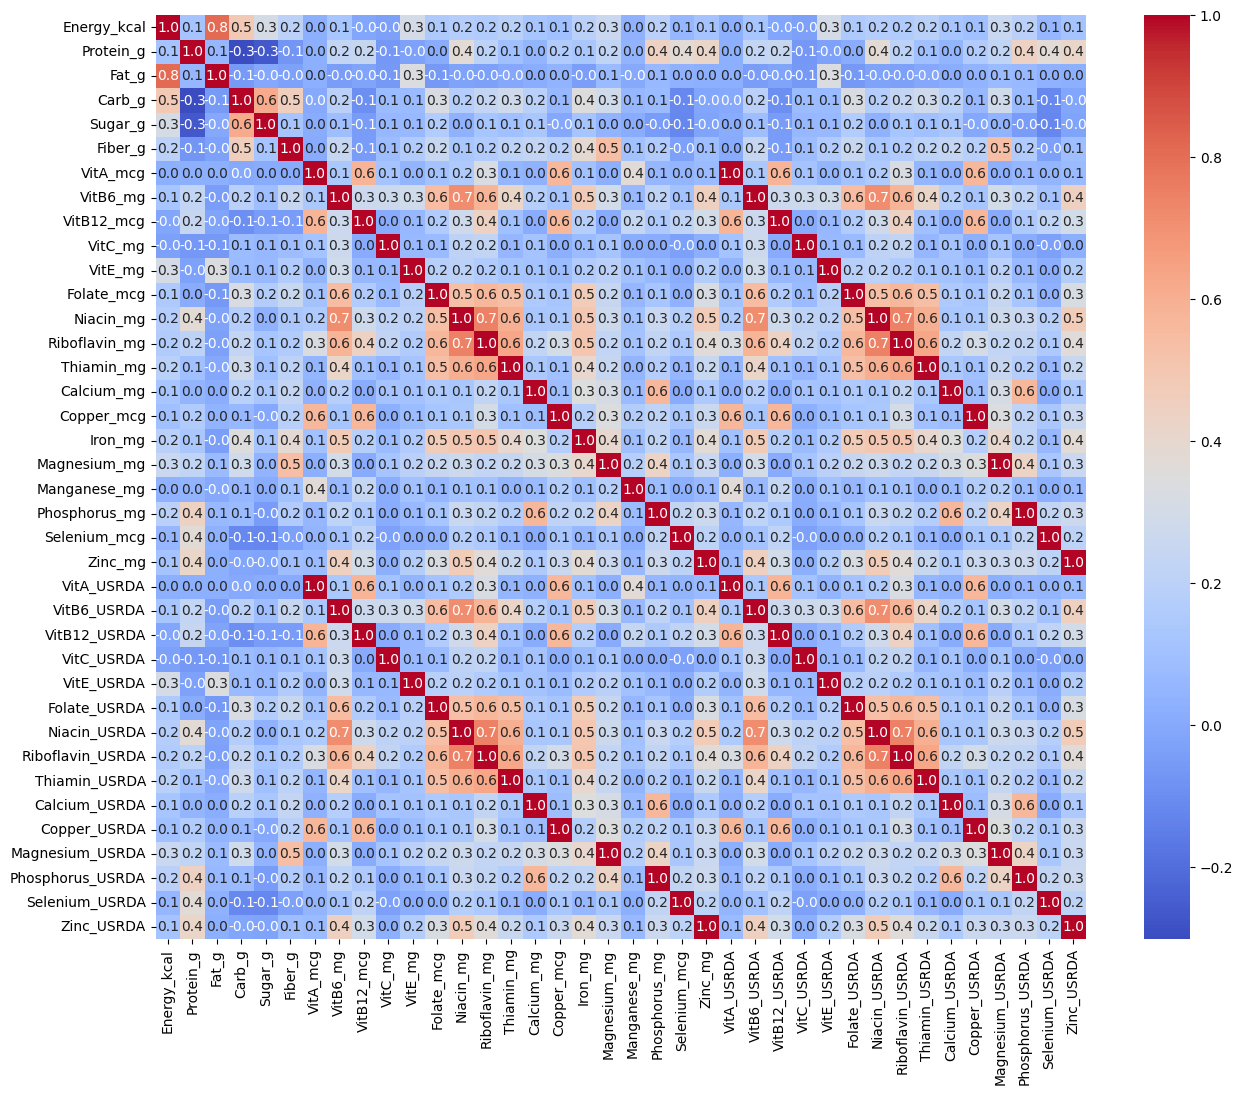

In [72]:
plt.figure(figsize=(15, 12))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".1f", cmap="coolwarm")
plt.show()

Identify redundant features and remove them from the dataframe. Plot the correlation matrix again.

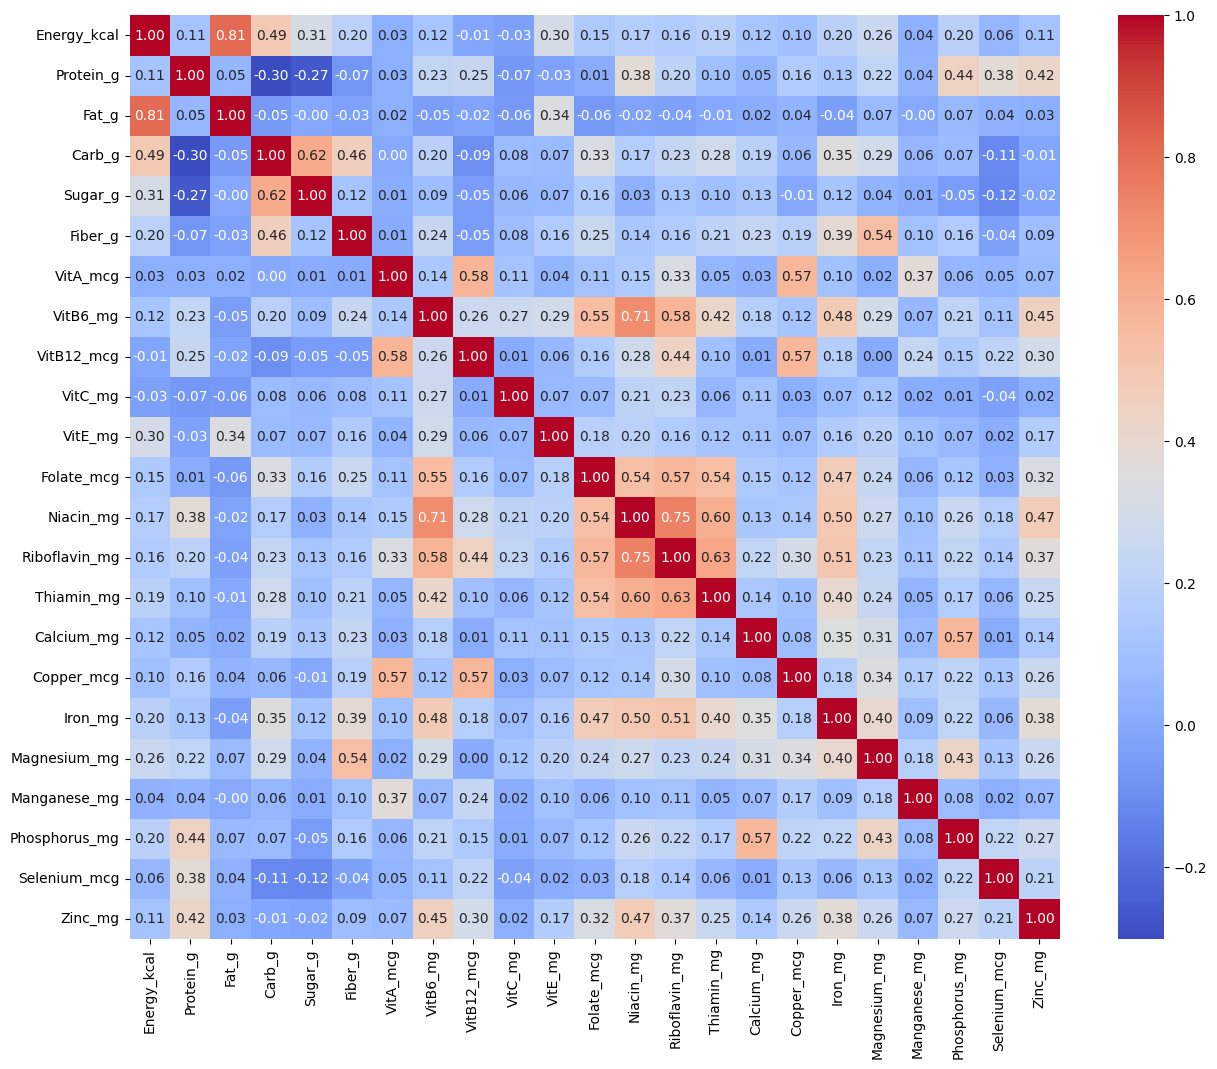

In [73]:
threshold = 0.9
redundant_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            redundant_features.add(correlation_matrix.columns[i])

cleaned_df = numeric_df.drop(columns=redundant_features)

plt.figure(figsize=(15, 12))
cleaned_correlation_matrix = cleaned_df.corr()
sns.heatmap(cleaned_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()


Explore the dataset by plotting the distribution of each feature separately.

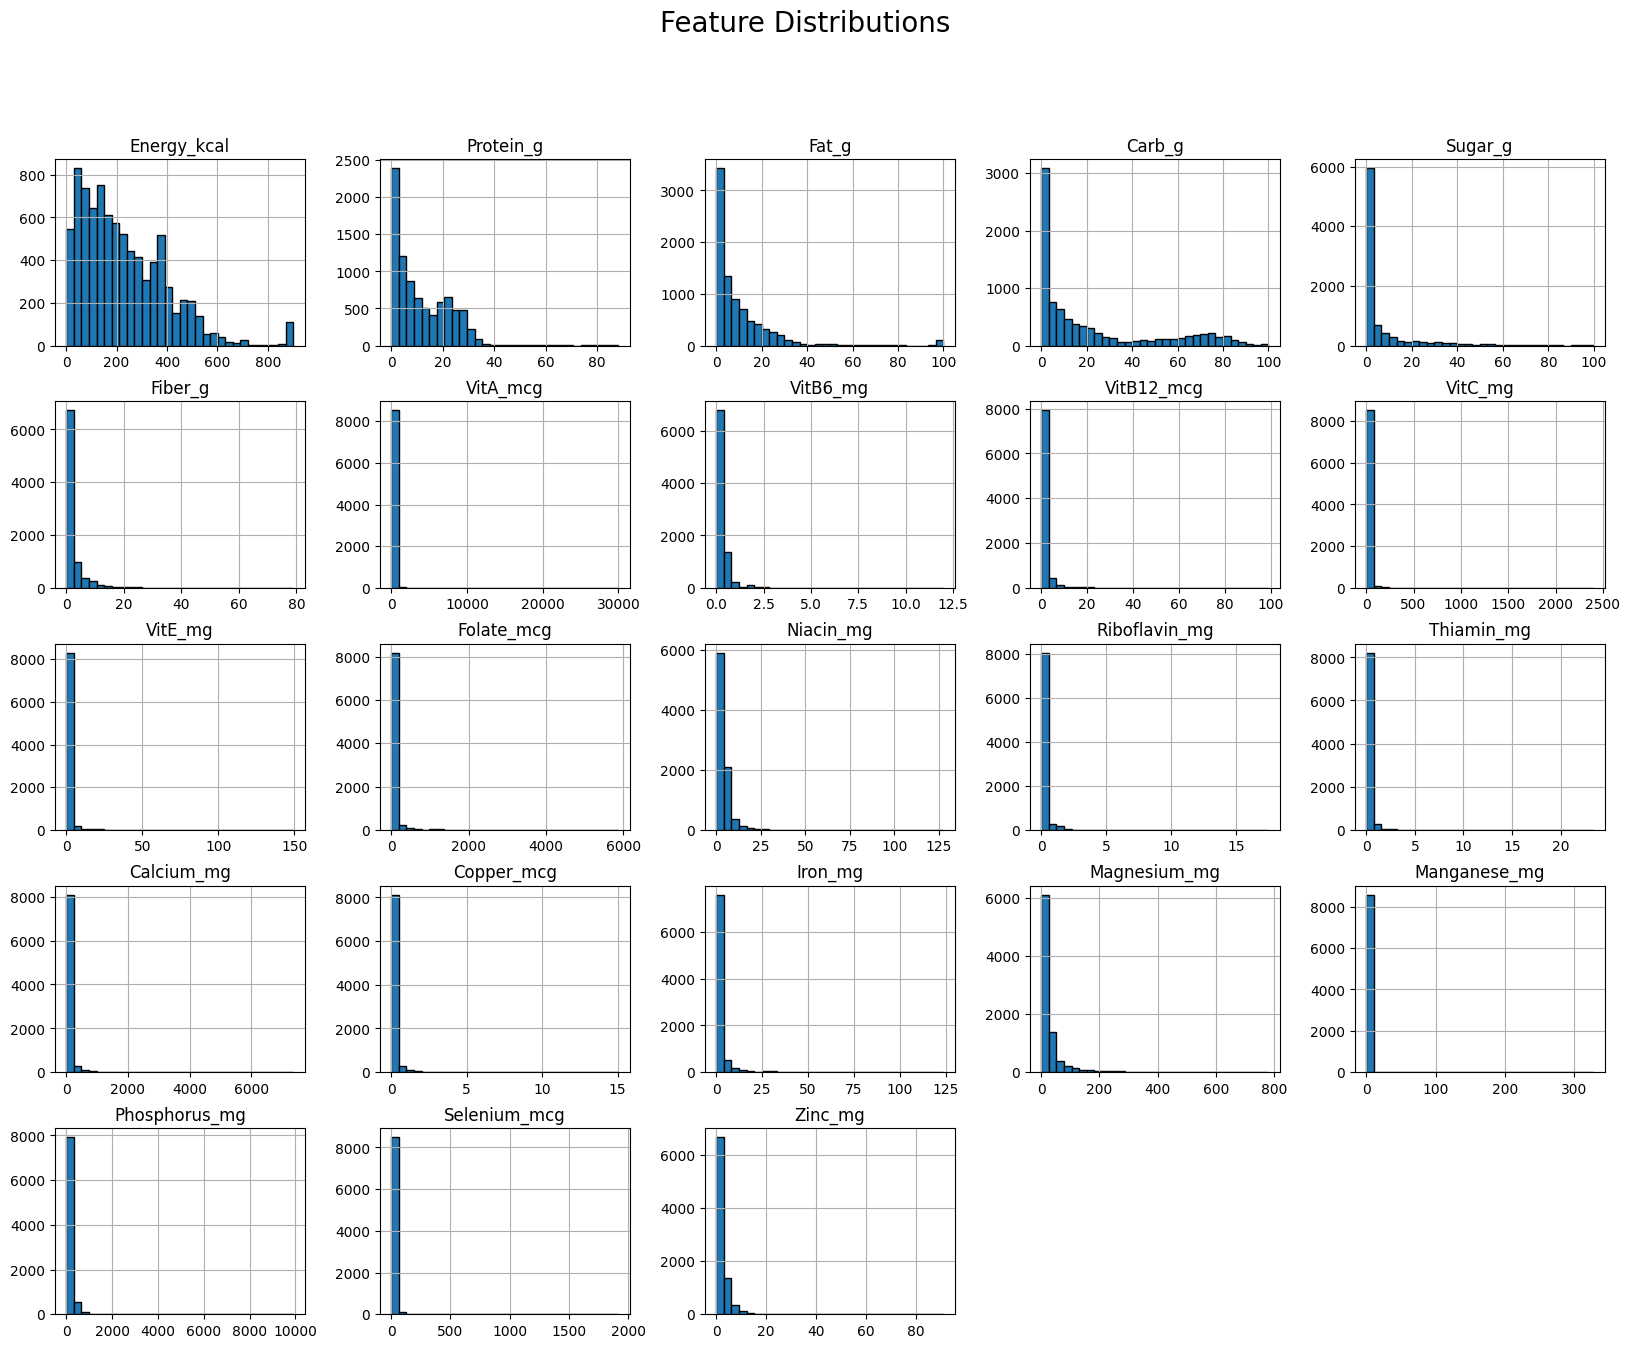

In [74]:
cleaned_df.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions", size=20)
plt.show()

We can use the Box-Cox transformation to make the data more normally distributed. You can look it up for more information

In [75]:
from scipy.stats import boxcox

cleaned_df = cleaned_df + 1
df_boxcoxed = pd.DataFrame(index=cleaned_df.index)
for col in cleaned_df.columns.values:
    df_boxcoxed["%s_boxcoxed" % col] = boxcox(cleaned_df.loc[:, col])[0]

Now plot the feature distributions again and compare it with the previous plots. (No need to write down anything)

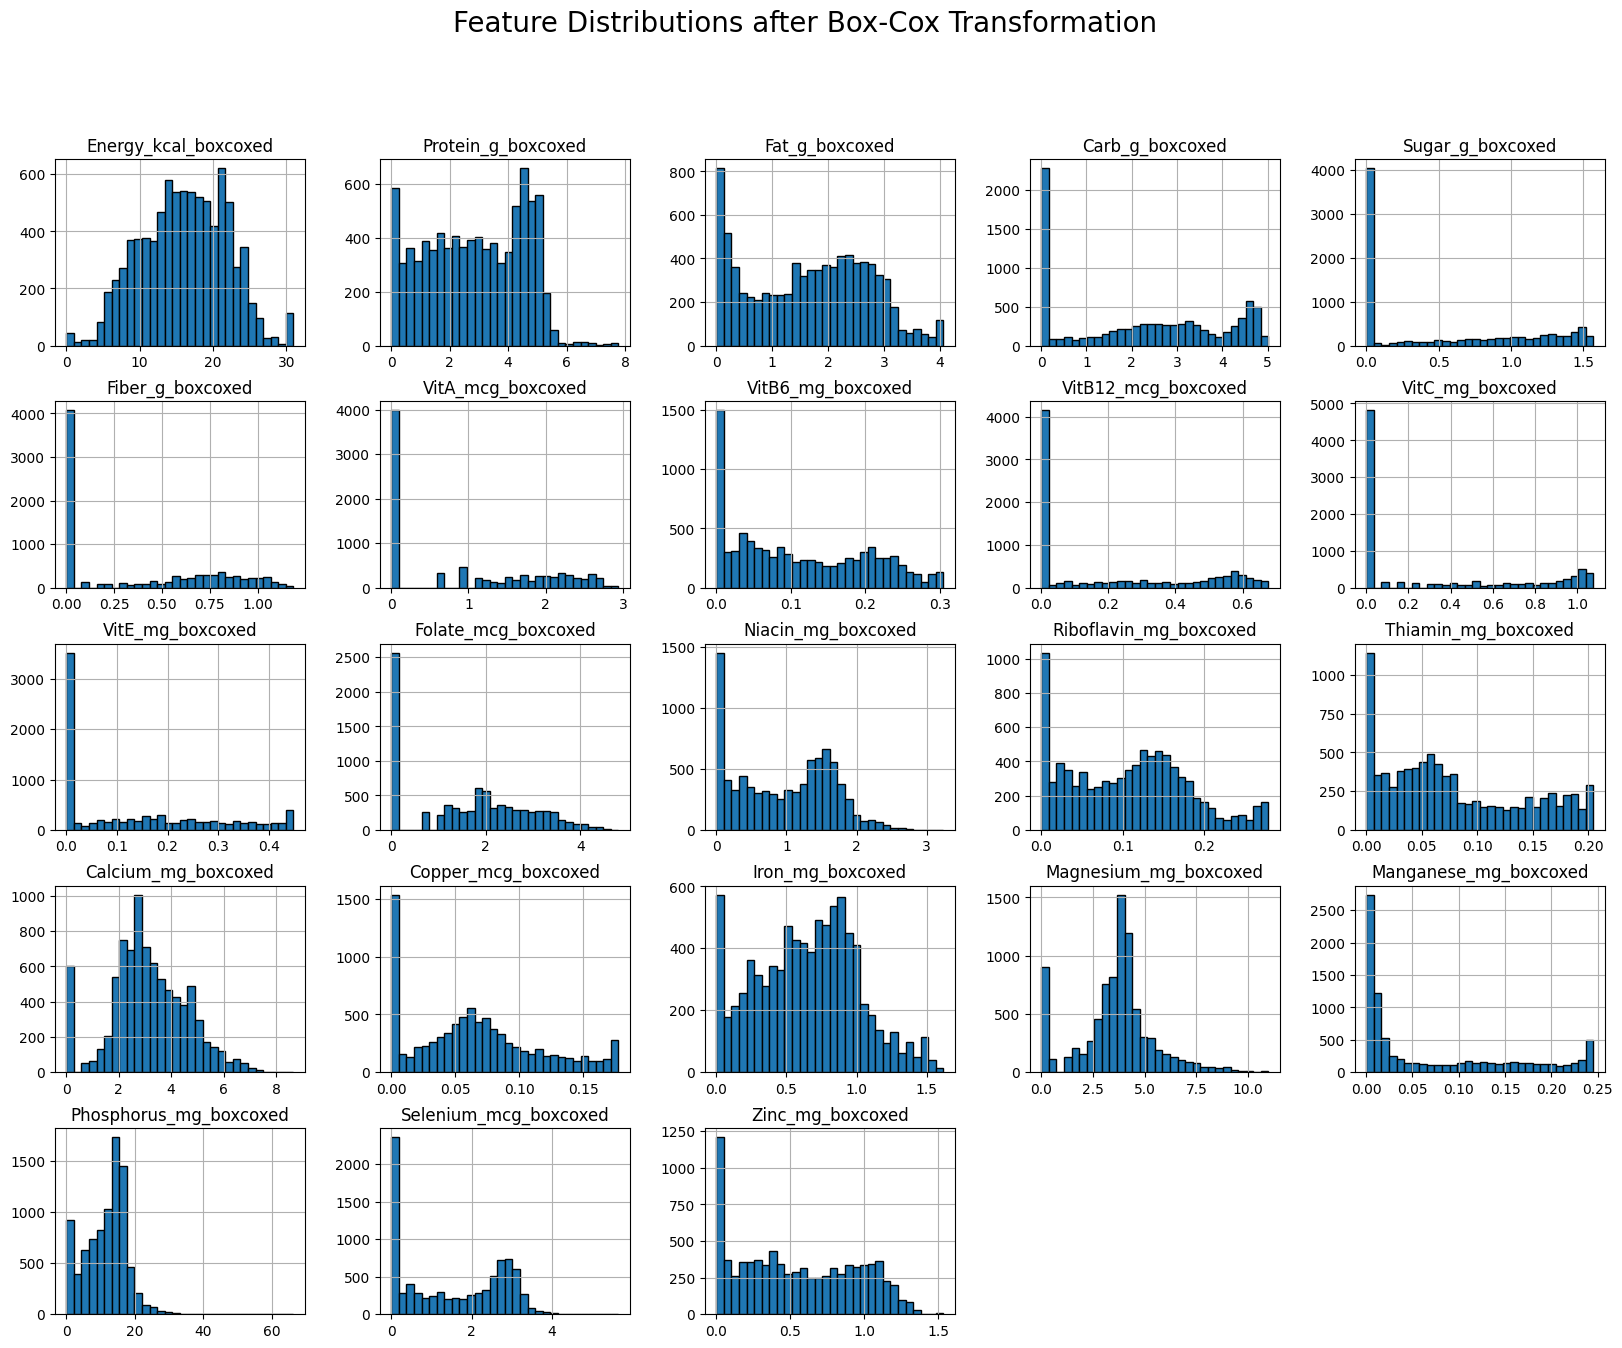

In [76]:
df_boxcoxed.hist(figsize=(20, 15), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions after Box-Cox Transformation", size=20)
plt.show()

Finally, Standardize the data to mean 0 and variance 1. You can use standard scaler.

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_boxcoxed)

print("Total mean: ", np.mean(df_standardized))
print("Total standard dev: ", np.std(df_standardized))

Total mean:  7.743006595103355e-18
Total standard dev:  0.9999999999999999


# Model Implementation (40)

Implement PCA from scratch. Remember to calculate and save components and explained variance ratio for later sections.

In [78]:
class CustomPCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.explained_variance_ratio_ = None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        cov_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        self.components = eigenvectors[:, :self.n_components]
        total_variance = np.sum(eigenvalues)
        explained_variance = eigenvalues[:self.n_components]
        self.explained_variance_ratio_ = explained_variance / total_variance

    def transform(self, X):
        X_centered = X - self.mean
        return np.dot(X_centered, self.components)

    def get_explained_variance_ratio(self):
        return self.explained_variance_ratio_

    def get_components(self):
        return self.components

Fit the model and obtain the PCA results. The number of components should be the same as the number of features.

In [79]:
n_components = df_standardized.shape[1]
pca = CustomPCA(n_components=n_components)
pca.fit(df_standardized)
pca_result = pca.transform(df_standardized)

explained_variance_ratio = pca.get_explained_variance_ratio()

#### check the eigenvalues to find most important components
Plot the explained variance ratio based on the number of components.


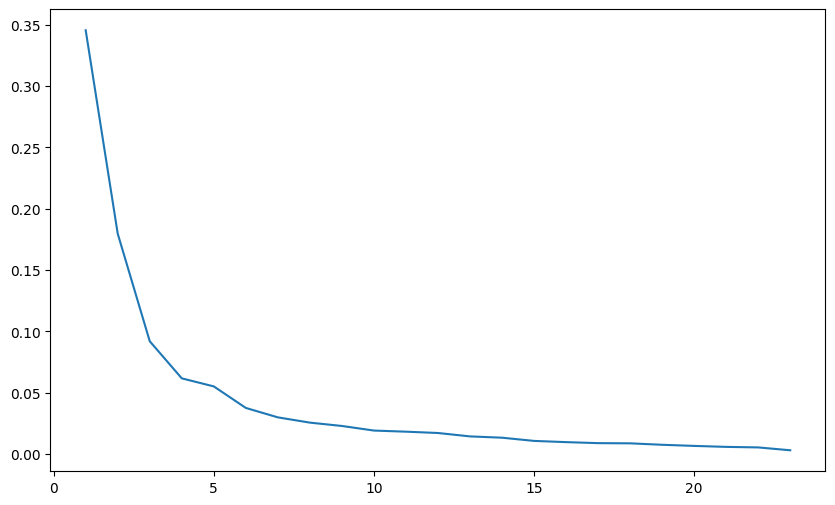

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_components + 1), explained_variance_ratio)
plt.show()

therefore we are going to pick 5 components

In [81]:

n_selected_components = 5
pca_5_components = pca_result[:, :n_selected_components]

pca_df = pd.DataFrame(data=pca_5_components, columns=[f'PC{i+1}' for i in range(n_selected_components)])
pca_df['FoodGroup'] = df['FoodGroup']

total_explained_variance_5 = np.sum(explained_variance_ratio[:n_selected_components])
print(total_explained_variance_5)

0.7342383069200722


Build a new DataFrame with the first 5 components as features and include the FoodGroup column from the first section.

In [82]:
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,FoodGroup
0,-2.638414,-1.702512,1.283725,3.759546,2.413650,Dairy and Egg Products
1,-2.537931,-1.550464,1.279816,3.634065,2.492683,Dairy and Egg Products
2,-3.751335,-2.080190,2.067932,3.668154,2.457203,Dairy and Egg Products
3,2.000578,-1.361858,-0.395834,2.432792,0.887796,Dairy and Egg Products
4,1.582713,-1.321484,-0.238444,2.597599,1.286317,Dairy and Egg Products


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

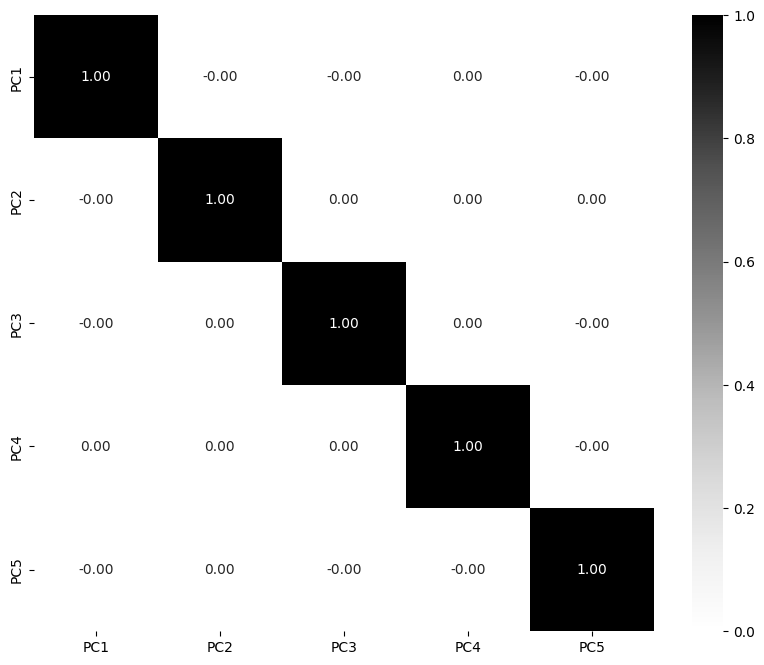

In [83]:
plt.figure(figsize=(10, 8))
correlation_matrix_pca = pca_df.drop(columns=['FoodGroup']).corr()
sns.heatmap(correlation_matrix_pca, annot=True, fmt=".2f", cmap="Greys")
plt.show()

# Result Analysis (30)

### 1- Eigenvectors (10):

In this part, you are required to plot the contribution of nutrients to our new axes or components. Essentially, plot the eigenvectors calculated in our PCA model.

In [84]:
eigenvectors = pca.get_components()

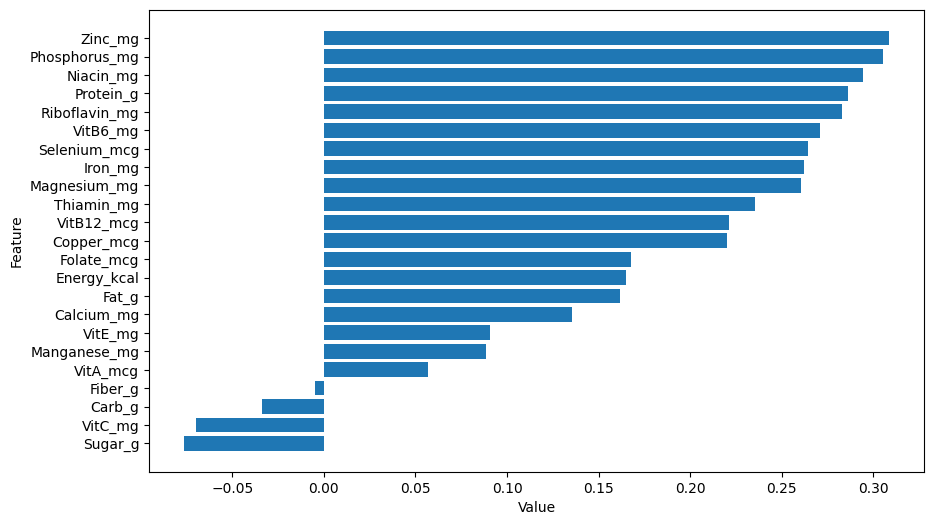

In [97]:
sorted_indices_1 = np.argsort(eigenvectors[:, 0])
sorted_eigenvectors_1 = eigenvectors[sorted_indices_1, 0]
sorted_features_1 = cleaned_df.columns[sorted_indices_1]

sorted_indices_2 = np.argsort(eigenvectors[:, 1])
sorted_eigenvectors_2 = eigenvectors[sorted_indices_2, 1]
sorted_features_2 = cleaned_df.columns[sorted_indices_2]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features_1, sorted_eigenvectors_1)
plt.xlabel("Value")
plt.ylabel("Feature")
plt.show()

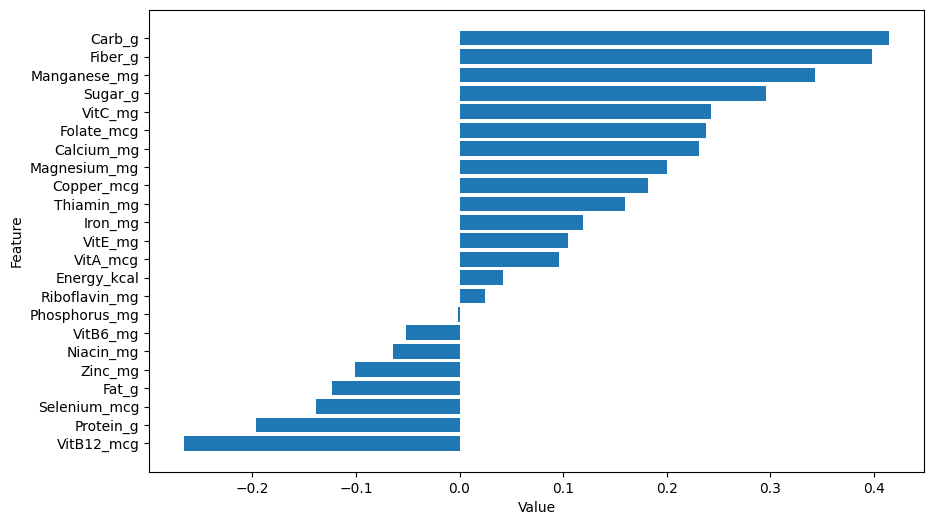

In [86]:
plt.figure(figsize=(10, 6))
plt.barh(sorted_features_2, sorted_eigenvectors_2)
plt.xlabel("Value")
plt.ylabel("Feature")
plt.show()

### What do these plots tell us about the first and second components?

<span style="color:skyblue;font-size: 20px;">
PC1 shows the different between foods that are high in minerals and vitamins (such as Zinc, Phosphorus, and Niacin) from those high in sugars and carbohydrates. Foods with high PC1 scores are rich in these positive contributing nutrients, But those with low PC1 scores have higher sugar and carbohydrate content.

PC2 shows the different between foods based on their carbohydrate and fiber content versus their protein and fat content. Foods with high PC2 scores are rich in carbohydrates and fiber, But those with low PC2 scores are rich in protein and fat.

</span>



### 2- Distributions (10)

We're now curious about the relationship between PCAs and the food groups. To better understand this, select the top 500 samples with the highest PCA1 values and plot their food group distribution. Essentially, we're seeking to identify which food groups are more likely to be associated with high PCA1 values. No need for normalization; simply plotting the counts will suffice.

Afterward, plot the distribution of PCA1 for each food group. We're interested in understanding the PCA1 values for each food group.

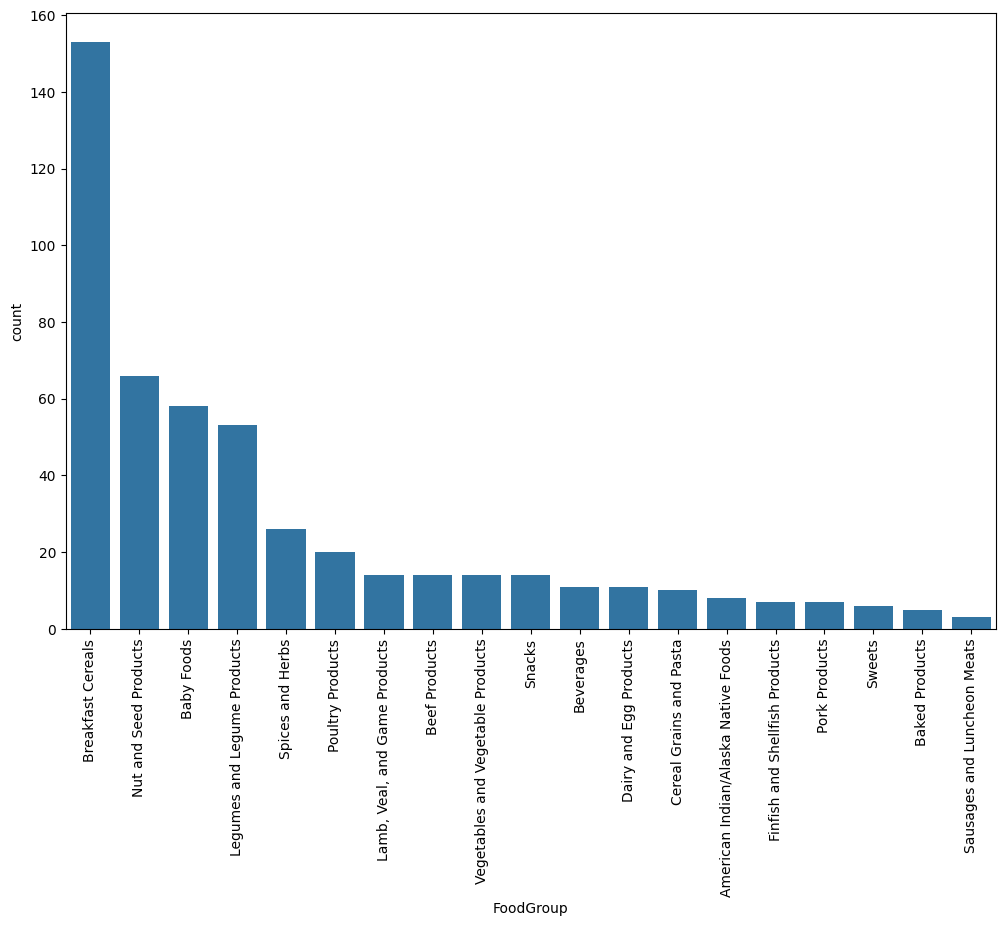

In [87]:
top_500_pca1 = pca_df.nlargest(500, 'PC1')

plt.figure(figsize=(12, 8))
sns.countplot(data=top_500_pca1, x='FoodGroup', order=top_500_pca1['FoodGroup'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

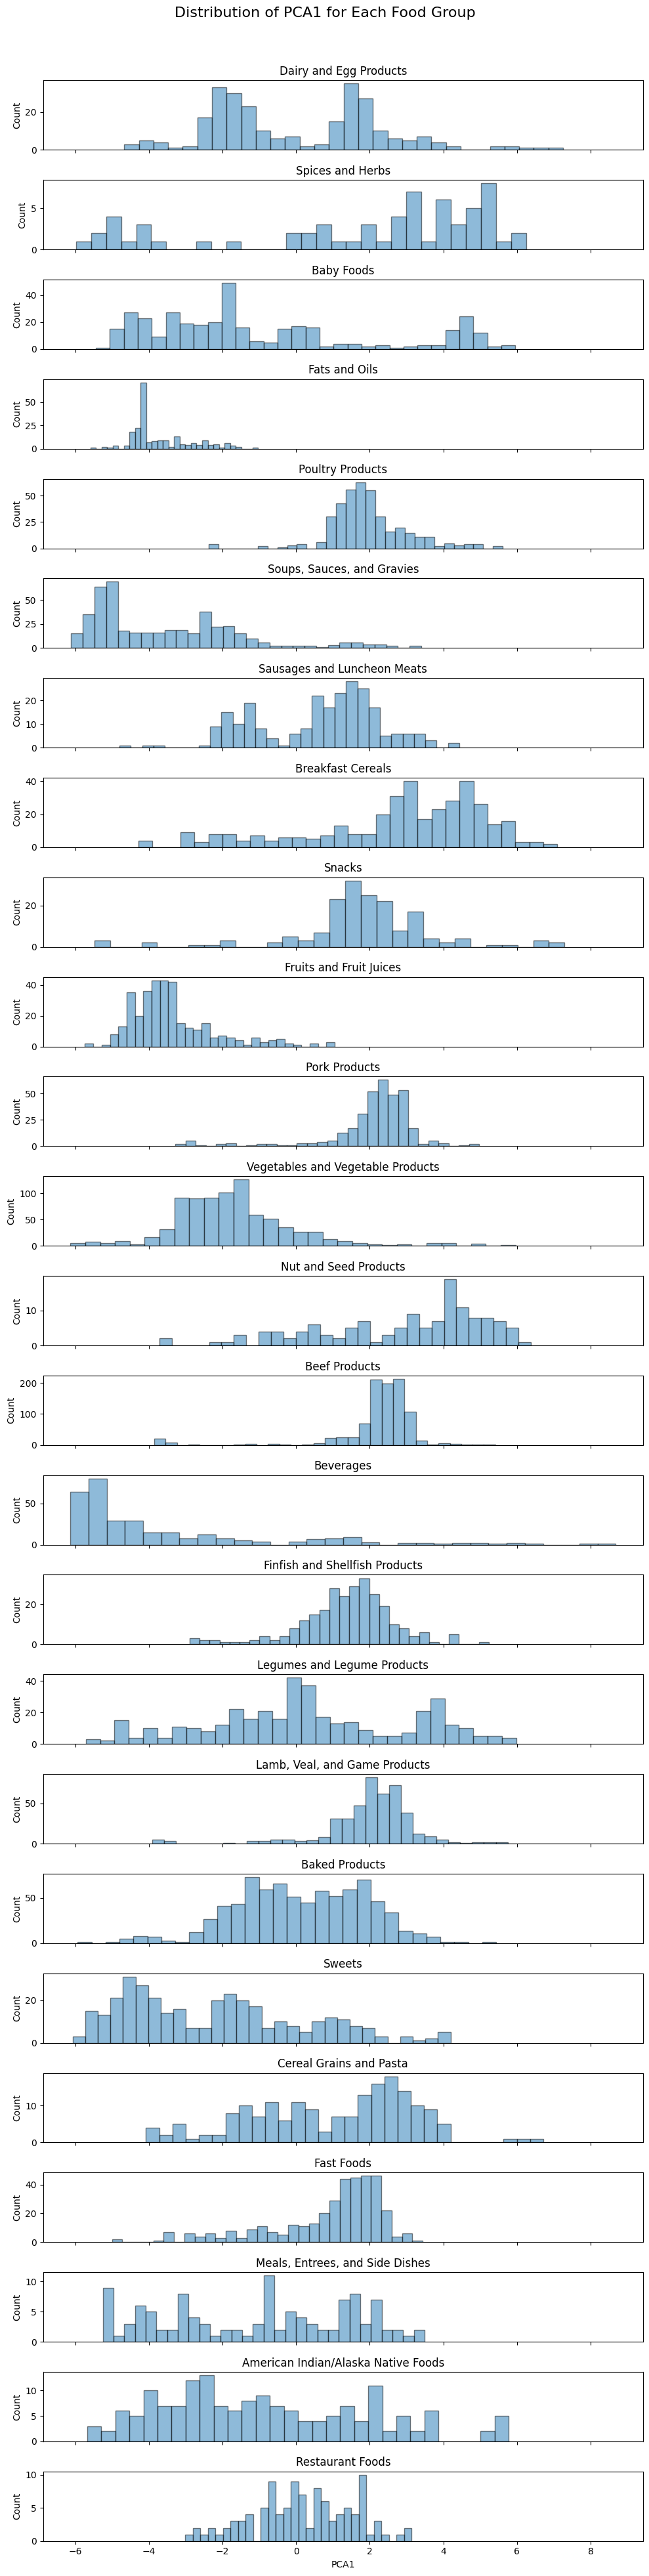

In [88]:
unique_food_groups = pca_df['FoodGroup'].unique()

fig, axes = plt.subplots(nrows=len(unique_food_groups), ncols=1, figsize=(10, 40), sharex=True)
fig.suptitle('Distribution of PCA1 for Each Food Group', size=16)

for ax, food_group in zip(axes, unique_food_groups):
    subset = pca_df[pca_df['FoodGroup'] == food_group]
    ax.hist(subset['PC1'], bins=30, alpha=0.5, edgecolor='black')
    ax.set_title(food_group)
    ax.set_ylabel('Count')

plt.xlabel('PCA1')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Do the same for pca2.

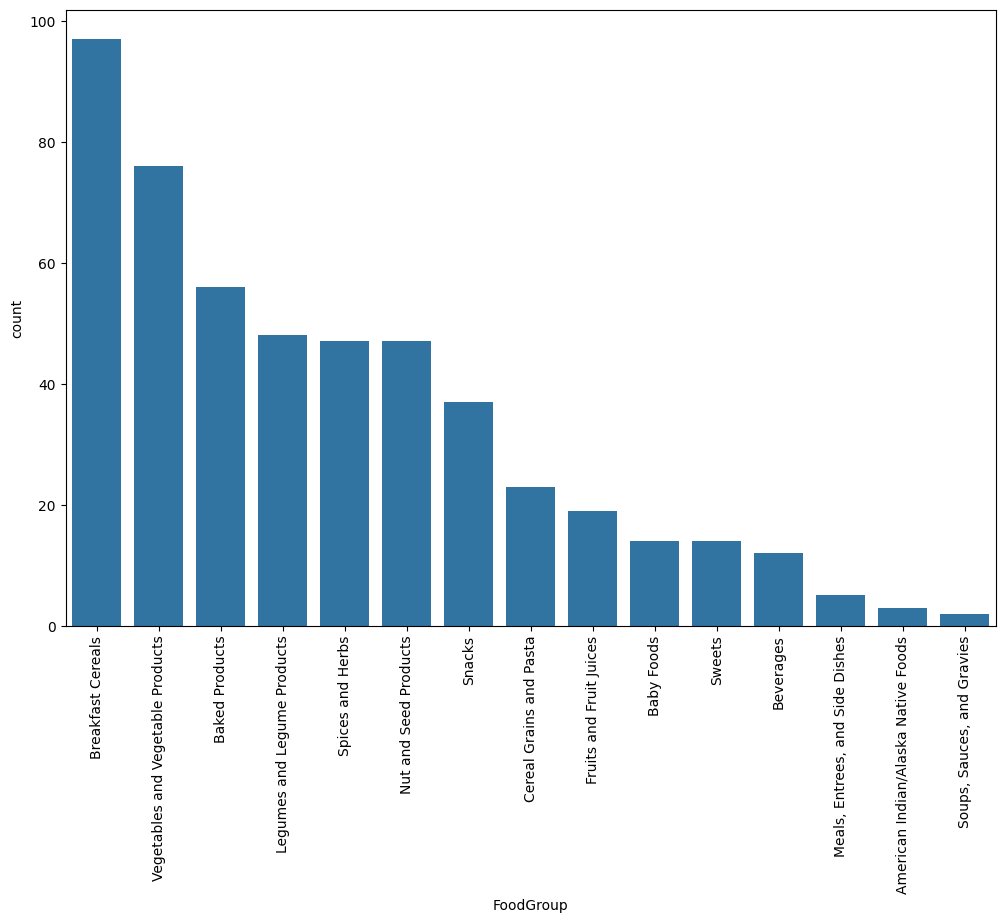

In [89]:
top_500_pca2 = pca_df.nlargest(500, 'PC2')

plt.figure(figsize=(12, 8))
sns.countplot(data=top_500_pca2, x='FoodGroup', order=top_500_pca2['FoodGroup'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

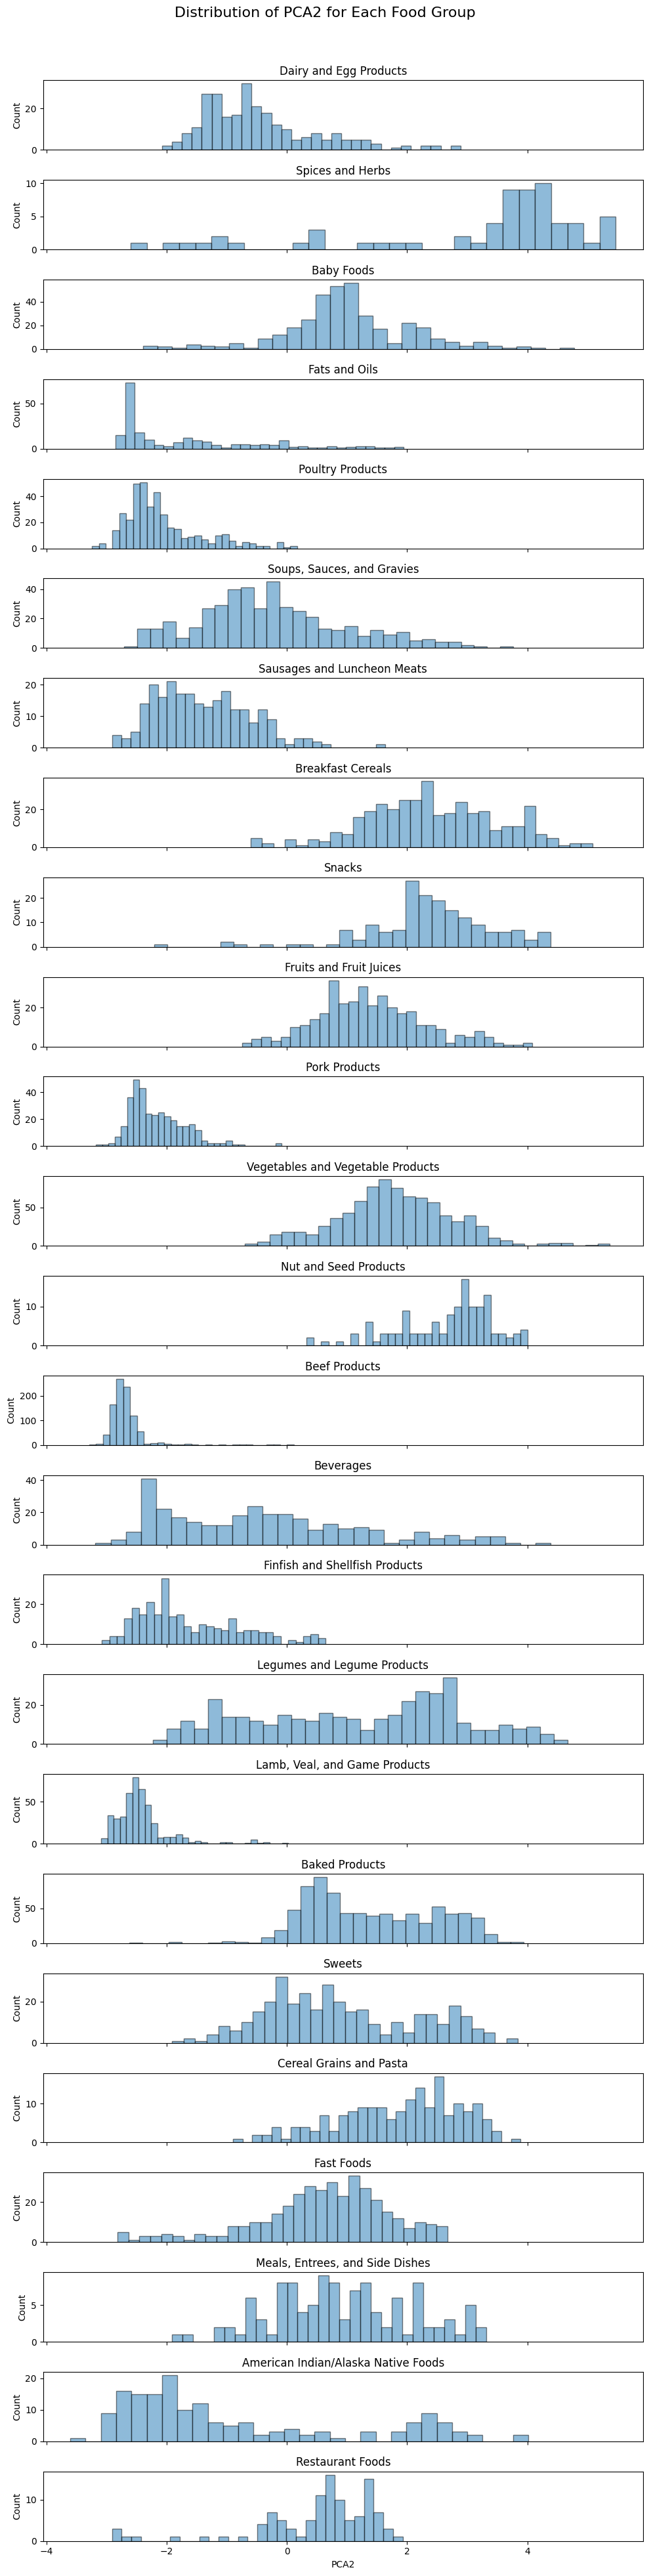

In [90]:
unique_food_groups = pca_df['FoodGroup'].unique()

fig, axes = plt.subplots(nrows=len(unique_food_groups), ncols=1, figsize=(10, 40), sharex=True)
fig.suptitle('Distribution of PCA2 for Each Food Group', size=16)

for ax, food_group in zip(axes, unique_food_groups):
    subset = pca_df[pca_df['FoodGroup'] == food_group]
    ax.hist(subset['PC2'], bins=30, alpha=0.5, edgecolor='black')
    ax.set_title(food_group)
    ax.set_ylabel('Count')

plt.xlabel('PCA2')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

### 3- Final result (5)

Lastly, plot the pca1 and pca2 for ```Beverages``` and ```Breakfast Cereals``` in ```FoodGroup```.


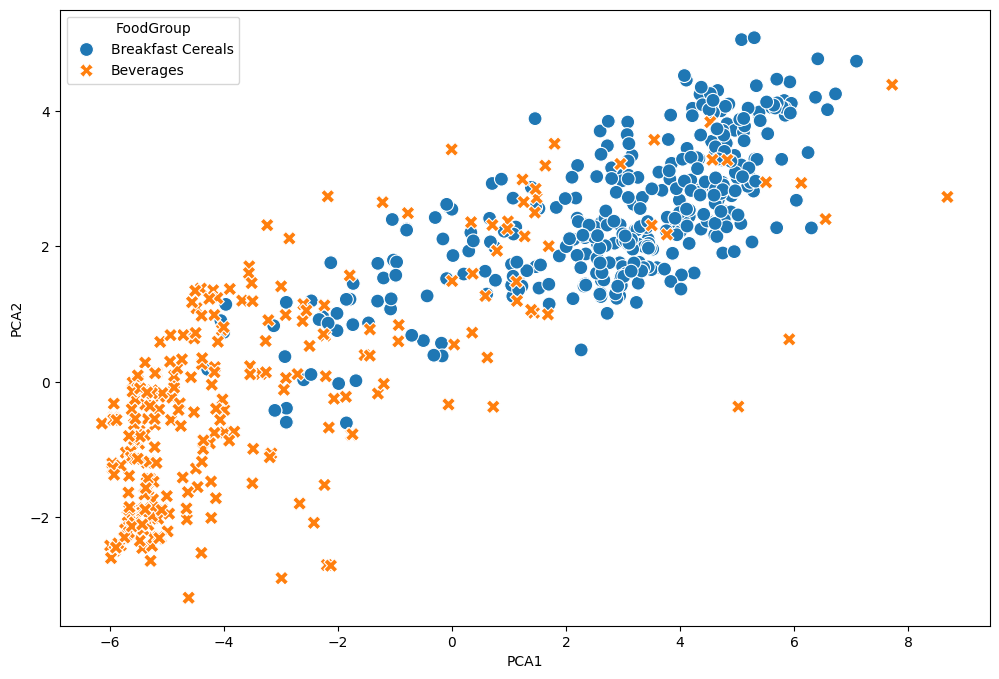

In [92]:
beverages_breakfast_df = pca_df[pca_df['FoodGroup'].isin(['Beverages', 'Breakfast Cereals'])]

plt.figure(figsize=(12, 8))
sns.scatterplot(data=beverages_breakfast_df, x='PC1', y='PC2', hue='FoodGroup', style='FoodGroup', s=100)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

### What can we learn from the plots in the last subsection (distributions)? (2.5)

<span style="color:skyblue;font-size: 20px;">
PCA1 Distributions
For breakfast cereals, most values are between 0 to 2, which means they generally have positive PCA1 scores. This shows that breakfast cereals are high in nutrients like Zinc, Phosphorus, and Niacin. Nut and seed products have values that are more spread out but still mostly positive. This means nuts and seeds have different nutrient profiles but are often high in the nutrients that contribute positively to PCA1. Vegetables and vegetable products have values centered around 0. This indicates a balanced nutrient profile with a variety of nutrients, not strongly skewed towards the positive or negative side of PCA1.

PCA2 Distributions
Vegetables and vegetable products show a wide range of PCA2 values, mostly between 0 and 1. This indicates variability in carbohydrate, fiber, protein, and fat content. Beverages generally have values between -2 and 0, which means they usually have lower PCA2 scores. This suggests that beverages are low in carbohydrates and fiber but might be higher in protein or certain vitamins. Fast foods have values that are mostly positive, ranging from 0 to 2. This shows that fast foods are higher in carbohydrates and fiber, reflecting their typical composition.

The PCA1 and PCA2 scores help separate food groups based on their nutrient profiles.
</span>


### How do the last plot and the distribution of PCA1 in each food group relate to each other? (2.5)

<span style="color:skyblue;font-size: 20px;">
The scatter plot of PCA1 and PCA2 for Breakfast Cereals and Beverages shows how these two food groups are spread out based on their nutrient content. Here's how this plot relates to the distribution of PCA1 in each food group.

For breakfast cereals, the scatter plot shows that they are mostly in the positive area of PCA1. This matches the histogram, where most values for breakfast cereals are between 0 and 2. The scatter plot also shows that breakfast cereals have a wide range of PCA2 values, indicating they vary a lot in terms of carbs, fiber, protein, and fat.

In the case of beverages, the scatter plot shows that they are mostly in the negative area of PCA1. This fits the histogram, where beverage values are mostly between -2 and 0. The scatter plot shows that beverages are clustered around lower PCA2 values, meaning they are generally low in carbs and fiber but might have more protein or specific vitamins.

</span>

